<a href="https://colab.research.google.com/github/ivanozono/python_DataAnalyts/blob/main/ProyectStatisticsFundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


url = 'https://raw.githubusercontent.com/ivanozono/python_fundamentals/main/dataWorldHealthOrganization.csv'
df = pd.read_csv(url, delimiter=',', error_bad_lines=False)

df.head()

<ipython-input-44-1ebf2b19873b>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url, delimiter=',', error_bad_lines=False)


,Location,Indicator,Period,Dim1,First Tooltip
0,Afghanistan,"Cancer, age-standardized death rates (15+), pe...",2016,Male,170.6
1,Afghanistan,"Cancer, age-standardized death rates (15+), pe...",2016,Female,142
2,Albania,"Cancer, age-standardized death rates (15+), pe...",2016,Male,186.4
3,Albania,"Cancer, age-standardized death rates (15+), pe...",2016,Female,138.2
4,Algeria,"Cancer, age-standardized death rates (15+), pe...",2016,Male,100.7


**Fuente de datos: World Health Organization **


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       388 non-null    object
 1   Indicator      388 non-null    object
 2   Period         388 non-null    int64 
 3   Dim1           388 non-null    object
 4   First Tooltip  388 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.3+ KB


In [ ]:

# Reemplazar 'No data' por NaN en la columna 'First Tooltip'
df['First Tooltip'] = df['First Tooltip'].replace('No data', np.nan)

# Cambiar el tipo de dato de la columna 'First Tooltip' a float
df['First Tooltip'] = df['First Tooltip'].astype(float)

# Verificar los cambios de tipo de datos
print(df.dtypes)


Location          object
Indicator         object
Period             int64
Dim1              object
First Tooltip    float64
dtype: object


In [ ]:
# Exploración de los datos

df.columns  # Ver las columnas disponibles

Index(['Location', 'Indicator', 'Period', 'Dim1', 'First Tooltip'], dtype='object')

In [ ]:
# Descripción estadística de los datos numéricos

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Period,388.0,2016.000000,0.000000,2016.0,2016.000,2016.00,2016.000,2016.0
First Tooltip,366.0,153.051093,51.573431,66.5,116.225,139.55,178.825,370.8


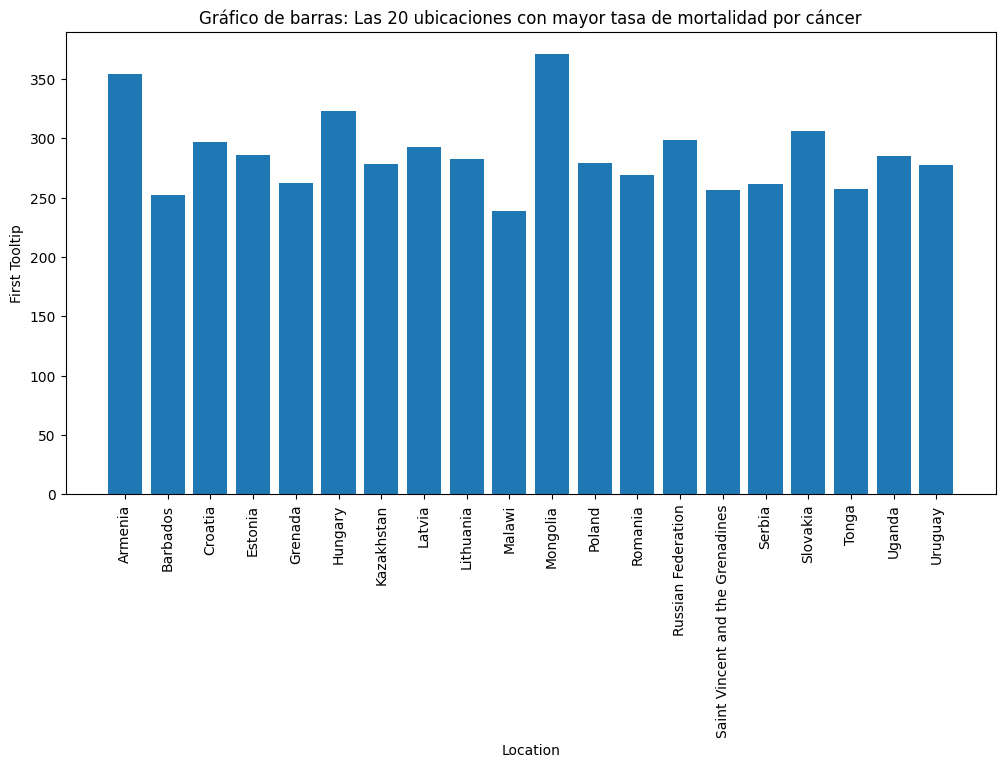

In [ ]:
# Gráfico de barras para la variable 'Location'


# Calcular la tasa de mortalidad promedio por ubicación
df['First Tooltip'] = df['First Tooltip'].replace('No data', 0).astype(float)
mortality_by_location = df.groupby('Location')['First Tooltip'].mean().reset_index()

# Seleccionar las 20 ubicaciones con la tasa de mortalidad más alta
top_20_locations = mortality_by_location.nlargest(20, 'First Tooltip')

# Filtrar el DataFrame original para incluir solo las filas correspondientes a estas 20 ubicaciones
df_filtered = df[df['Location'].isin(top_20_locations['Location'])]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_filtered['Location'], df_filtered['First Tooltip'])

# Personalizar el gráfico
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('First Tooltip')
plt.title('Gráfico de barras: Las 20 ubicaciones con mayor tasa de mortalidad por cáncer')

# Mostrar el gráfico
plt.show()



In [ ]:

# Filtrar los valores 'No data'
df_filtered = df[df['First Tooltip'] != 'No data']


In [ ]:

# Calcular la cantidad de Mortalidad según el grupo (Genero)
grouped_data = df_filtered.groupby('Dim1')['First Tooltip'].sum()
grouped_data


Dim1
Female    23406.5
Male      32610.2
Name: First Tooltip, dtype: float64

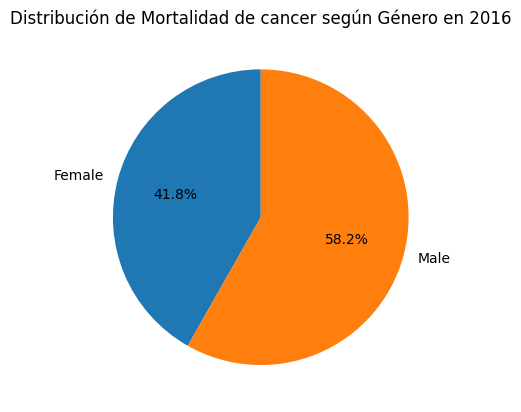

In [ ]:
# Crear el gráfico de pastel
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)

# Establecer título
plt.title('Distribución de Mortalidad de cancer según Género en 2016')

# Mostrar el gráfico
plt.show()

In [ ]:
# Estadistica descriptiva en general 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Period,388.0,2016.000000,0.000000,2016.0,2016.000,2016.00,2016.000,2016.0
First Tooltip,366.0,153.051093,51.573431,66.5,116.225,139.55,178.825,370.8


In [ ]:
# Generar filtro para analizar los datos en Hombres
df_filtermale = df.loc[df['Dim1']=='Male']
df_filtermale


,Location,Indicator,Period,Dim1,First Tooltip
0,Afghanistan,"Cancer, age-standardized death rates (15+), pe...",2016,Male,170.6
2,Albania,"Cancer, age-standardized death rates (15+), pe...",2016,Male,186.4
4,Algeria,"Cancer, age-standardized death rates (15+), pe...",2016,Male,100.7
6,Andorra,"Cancer, age-standardized death rates (15+), pe...",2016,Male,NaN
8,Angola,"Cancer, age-standardized death rates (15+), pe...",2016,Male,112.5
...,...,...,...,...,...
378,Venezuela (Bolivarian Republic of),"Cancer, age-standardized death rates (15+), pe...",2016,Male,165.3
380,Viet Nam,"Cancer, age-standardized death rates (15+), pe...",2016,Male,191.5
382,Yemen,"Cancer, age-standardized death rates (15+), pe...",2016,Male,107.9
384,Zambia,"Cancer, age-standardized death rates (15+), pe...",2016,Male,178.5


In [ ]:
# Estadistica descriptiva para Hombre que fallecen de Cancer 
df_filtermale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Period,194.0,2016.000000,0.000000,2016.0,2016.00,2016.0,2016.00,2016.0
First Tooltip,183.0,178.197814,57.833676,72.3,132.55,174.3,211.65,370.8


In [ ]:
# Generar filtro para analizar los datos en Mujeres
df_filterfemale = df.loc[df['Dim1']=='Female']
df_filterfemale

,Location,Indicator,Period,Dim1,First Tooltip
1,Afghanistan,"Cancer, age-standardized death rates (15+), pe...",2016,Female,142.0
3,Albania,"Cancer, age-standardized death rates (15+), pe...",2016,Female,138.2
5,Algeria,"Cancer, age-standardized death rates (15+), pe...",2016,Female,97.3
7,Andorra,"Cancer, age-standardized death rates (15+), pe...",2016,Female,NaN
9,Angola,"Cancer, age-standardized death rates (15+), pe...",2016,Female,90.9
...,...,...,...,...,...
379,Venezuela (Bolivarian Republic of),"Cancer, age-standardized death rates (15+), pe...",2016,Female,127.5
381,Viet Nam,"Cancer, age-standardized death rates (15+), pe...",2016,Female,112.9
383,Yemen,"Cancer, age-standardized death rates (15+), pe...",2016,Female,90.9
385,Zambia,"Cancer, age-standardized death rates (15+), pe...",2016,Female,157.1


In [ ]:
df_filterfemale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Period,194.0,2016.000000,0.000000,2016.0,2016.0,2016.0,2016.0,2016.0
First Tooltip,183.0,127.904372,26.792792,66.5,108.1,127.5,144.5,216.8


**PREGUNTA DE INVESTIGACION:  Hay alguna relacion entre el género de una persona y la mortandad por cancer**


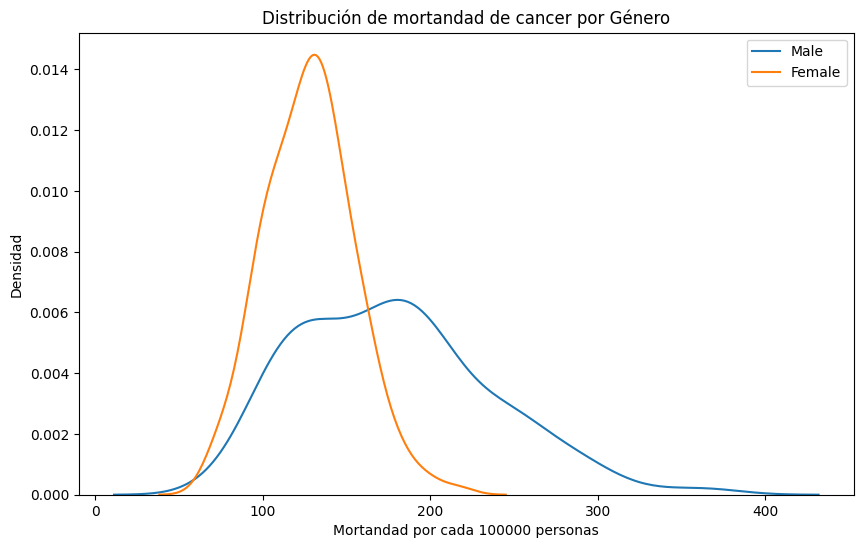

In [ ]:
#Analisis de la distribucion por genero

plt.figure(figsize=(10, 6))

# Gráfico de densidad para el género Male
sns.kdeplot(data=df_filtermale, x="First Tooltip", label="Male")

# Gráfico de densidad para el género Female
sns.kdeplot(data=df_filterfemale, x="First Tooltip", label="Female")

plt.xlabel("Mortandad por cada 100000 personas")
plt.ylabel("Densidad")
plt.title("Distribución de mortandad de cancer por Género")
plt.legend()
plt.show()


df_male = df_filtermale[['Dim1', 'First Tooltip']]
df_female = df_filterfemale[['Dim1', 'First Tooltip']]


Análisis de correlación:  Para evaluar la relación entre el género y la mortalidad por cáncer.  Calcular el coeficiente de correlación de Pearson para determinar la fuerza y la dirección de la relación lineal entre ambas variables.


In [ ]:
# Agregar columna 'Gender' al DataFrame
df['Gender'] = df['Dim1'].map({'Male': 0, 'Female': 1})

df



,Location,Indicator,Period,Dim1,First Tooltip,Gender
0,Afghanistan,"Cancer, age-standardized death rates (15+), pe...",2016,Male,170.6,0
1,Afghanistan,"Cancer, age-standardized death rates (15+), pe...",2016,Female,142.0,1
2,Albania,"Cancer, age-standardized death rates (15+), pe...",2016,Male,186.4,0
3,Albania,"Cancer, age-standardized death rates (15+), pe...",2016,Female,138.2,1
4,Algeria,"Cancer, age-standardized death rates (15+), pe...",2016,Male,100.7,0
...,...,...,...,...,...,...
383,Yemen,"Cancer, age-standardized death rates (15+), pe...",2016,Female,90.9,1
384,Zambia,"Cancer, age-standardized death rates (15+), pe...",2016,Male,178.5,0
385,Zambia,"Cancer, age-standardized death rates (15+), pe...",2016,Female,157.1,1
386,Zimbabwe,"Cancer, age-standardized death rates (15+), pe...",2016,Male,182.7,0


In [ ]:
df.dtypes

Location          object
Indicator         object
Period             int64
Dim1              object
First Tooltip    float64
Gender             int64
dtype: object

In [ ]:
# Calcular el coeficiente de correlación de Pearson
correlation = df['Gender'].corr(df['First Tooltip'])

print("Coeficiente de correlación de Pearson:", correlation)

Coeficiente de correlación de Pearson: -0.48825809822378874


RESULTADO: El coeficiente de correlación de Pearson es una medida estadística que indica la relación lineal entre dos variables. Su valor puede oscilar entre -1 y 1, donde -1 indica una correlación negativa perfecta (si una variable aumenta, la otra disminuye) y 1 indica una correlación positiva perfecta (si una variable aumenta, la otra también lo hace). Un valor de 0 indica que no hay relación lineal entre las variables. En este caso, el coeficiente es de -0.48825809822378874, lo que indica una correlación negativa moderada entre las variables analizadas.

In [ ]:
# Generar el dataFrame para Male y otro para Female con las variables a investigar correlacion Dim1 y First Tooltip
df_male = df_filtermale[['Dim1', 'First Tooltip']]
df_female = df_filterfemale[['Dim1', 'First Tooltip']]

In [ ]:


# Calcular medidas de resumen para el grupo "Male"
df_male_summary = df_male.groupby('Dim1')['First Tooltip'].describe()

# Calcular medidas de resumen para el grupo "Female"
df_female_summary = df_female.groupby('Dim1')['First Tooltip'].describe()

# Imprimir las medidas de resumen para cada grupo
print("Resumen de la mortalidad por cáncer para el grupo Male:")
print(df_male_summary)
print("\n")

print("Resumen de la mortalidad por cáncer para el grupo Female:")
print(df_female_summary)


Resumen de la mortalidad por cáncer para el grupo Male:
      count        mean        std   min     25%    50%     75%    max
Dim1                                                                  
Male  183.0  178.197814  57.833676  72.3  132.55  174.3  211.65  370.8


Resumen de la mortalidad por cáncer para el grupo Female:
        count        mean        std   min    25%    50%    75%    max
Dim1                                                                  
Female  183.0  127.904372  26.792792  66.5  108.1  127.5  144.5  216.8


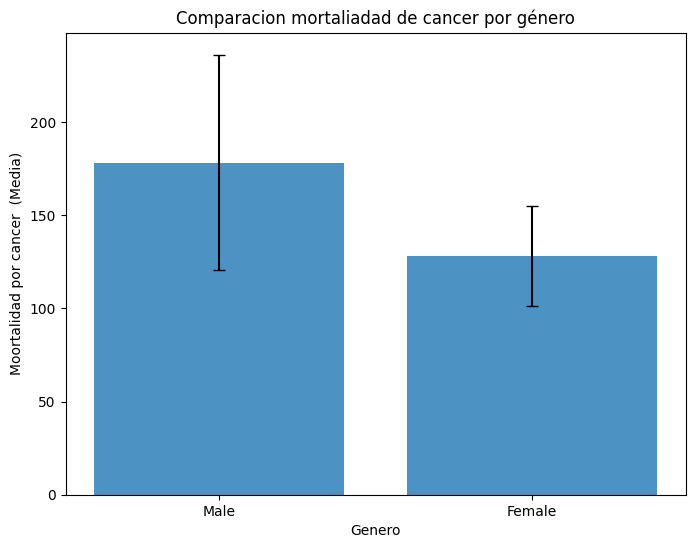

In [ ]:
# Calculala la media de valores de cada grupo
means_male = df_male['First Tooltip'].mean()
means_female = df_female['First Tooltip'].mean()

# Calcula la desviacion estandar por cada grupo
std_male = df_male['First Tooltip'].std()
std_female = df_female['First Tooltip'].std()

# Crea una lista por grupos
groups = ['Male', 'Female']

# Crea una lista de medias para la grafica  bar plot
means = [means_male, means_female]

# Crea una lista de los valores desviacion estander para representar rango de error por barra
std = [std_male, std_female]

# Tamaño de la figur
plt.figure(figsize=(8, 6))

# Plot la bar plot con error barra
plt.bar(groups, means, yerr=std, capsize=4, alpha=0.8)

# Set the axis labels and title
plt.xlabel('Genero')
plt.ylabel('Moortalidad por cancer  (Media)')
plt.title('Comparacion mortaliadad de cancer por género')

# Show the plot
plt.show()

RESOUESTA: Al graficar los resultados, podemos observar que la media de la mortalidad por cáncer es mayor en el género "Male" en comparación con el género "Female". Esto indica que, en promedio, los hombres tienden a tener una mayor tasa de mortalidad por cáncer en comparación con las mujeres.

Además, al considerar la desviación estándar, podemos notar que hay una mayor variabilidad en los datos de morta


In [ ]:

df_male = df[df['Dim1'] == 'Male']

# Crear un mapa de calor
fig = px.choropleth(df_male,  # DataFrame de entrada
                    locations='Location',  # Columna con los nombres de los países
                    locationmode='country names',  # Modo de ubicación (nombres de países)
                    color='First Tooltip',  # Columna con los valores para asignar colores
                    color_continuous_scale='YlOrRd',  # Escala de colores
                    title='Mortalidad por cáncer en Mujetrers',  # Título del gráfico
                    labels={'First Tooltip': 'Tasa de mortalidad'},  # Etiqueta del color
                    hover_name='Location',  # Información que se muestra al pasar el cursor sobre un país
                    hover_data={'First Tooltip': True, 'Location': False},  # Información adicional al pasar el cursor
                    projection='natural earth')  # Proyección del mapa

# Mostrar el mapa
fig.show()


In [ ]:

import plotly.express as px

# Filtrar los datos solo para mujere
df_female = df[df['Dim1'] == 'Female']

# Crear un mapa de calor
fig = px.choropleth(df_female,  # DataFrame de entrada
                    locations='Location',  # Columna con los nombres de los países
                    locationmode='country names',  # Modo de ubicación (nombres de países)
                    color='First Tooltip',  # Columna con los valores para asignar colores
                    color_continuous_scale='YlOrRd',  # Escala de colores
                    title='Mortalidad por cáncer en Mujeres',  # Título del gráfico
                    labels={'First Tooltip': 'Tasa de mortalidad'},  # Etiqueta del color
                    hover_name='Location',  # Información que se muestra al pasar el cursor sobre un país
                    hover_data={'First Tooltip': True, 'Location': False},  # Información adicional al pasar el cursor
                    projection='natural earth')  # Proyección del mapa

# Mostrar el mapa
fig.show()
